# Final Project

### Step 1: Download the data

In [7]:
#%% grabbing data
#using consolidated crash data (see spreadsheet for sources)
crashdatalink='https://github.com/minkld/Practice-Session-3/raw/master/Crash%20Data.csv'

import pandas as pd
crashdata=pd.read_csv(crashdatalink)

crashdata.dtypes #checking data types and variable names

#because our columns have spaces in them, and this may cause trouble later on, lets replace spaces with underscores
crashdata.columns = [c.replace(' ', '_') for c in crashdata.columns]

### Step 2: Explore the data

In [8]:
#%% starting univariative analysis
crashes=crashdata["Number_fatalities_2015"] #variable of interest is number of fatal crashes
crashdata.iloc[:,[0,1]] #looking at two columns to make sure rows are properly organized

,State_,Number_fatalities_2015
0,Alabama,849
1,Alaska,65
2,Arizona,893
3,Arkansas,531
4,California,3176
5,Colorado,546
6,Connecticut,266
7,Delaware,126
8,Florida,2939
9,Georgia,1430


In [12]:
#getting descriptive statistics for variable of interest
#centrality
crashes.describe() 

count      50.000000
mean      701.380000
std       740.166195
min        45.000000
25%       251.000000
50%       538.500000
75%       887.000000
max      3516.000000
Name: Number_fatalities_2015, dtype: float64

Current size: [6.4, 4.8]


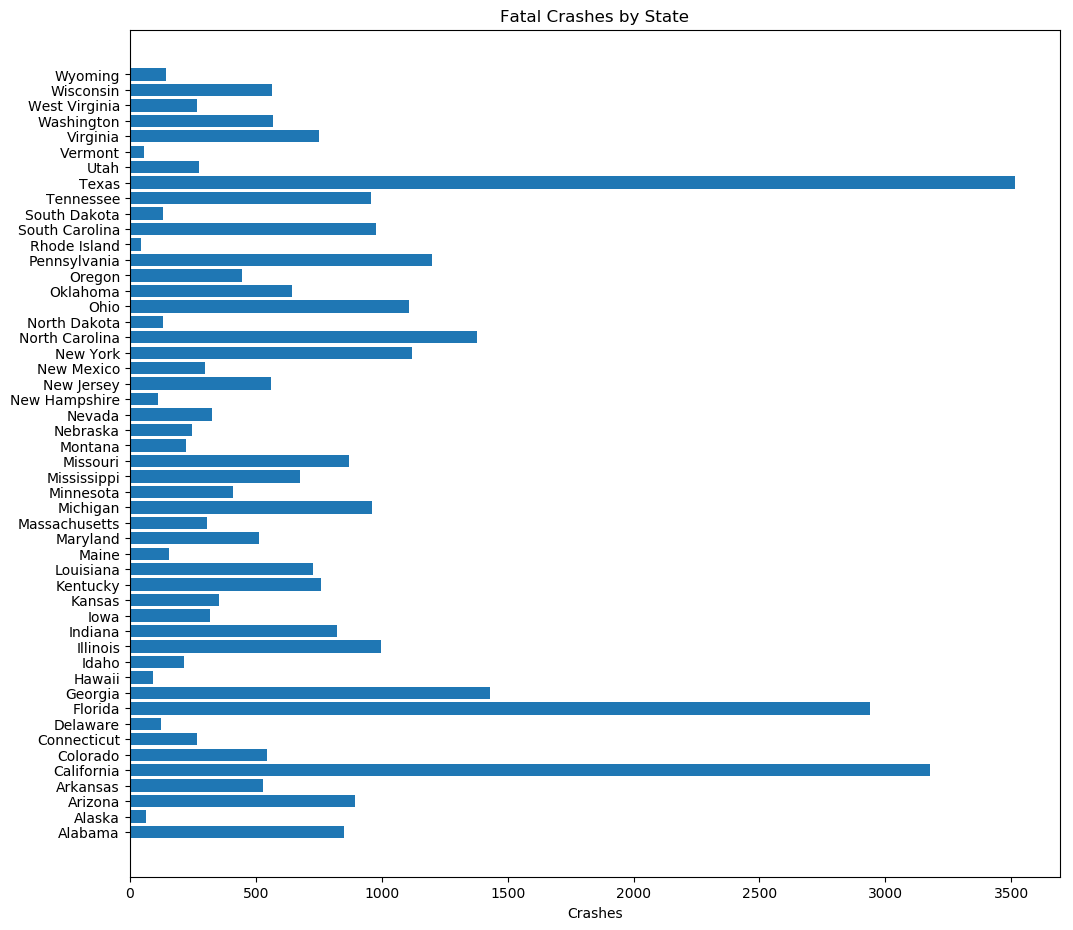

In [13]:
#creating bar chart
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

states=crashdata.iloc[:,0] #creating variable for state names which will become one of our axis
y_pos = np.arange(len(states))

#expanding bar graph dimensions
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 12
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size

#plotting
plt.barh(y_pos, crashes, align='center', alpha=1.0)
plt.yticks(y_pos, states)
plt.xlabel('Crashes')
plt.title('Fatal Crashes by State')

plt.show()

In [15]:
#%% looking at another, related variable
#getting the absolute number of crashes by state is interesting, but more populated states will likely have more fatalities
#let's see how the states compare on a more relative dimension: the number of fatalities per 100 million vehicle miles traveles (VMT)
crashesVMT=crashdata['Fatalities_per_100_million_vehicle_miles_travelled_2015']
crashesVMT #making sure the data looks ok

#running some descriptives
#centrality
crashesVMT.describe() 

count    50.000000
mean      1.153400
std       0.296515
min       0.520000
25%       0.935000
50%       1.200000
75%       1.340000
max       1.890000
Name: Fatalities_per_100_million_vehicle_miles_travelled_2015, dtype: float64

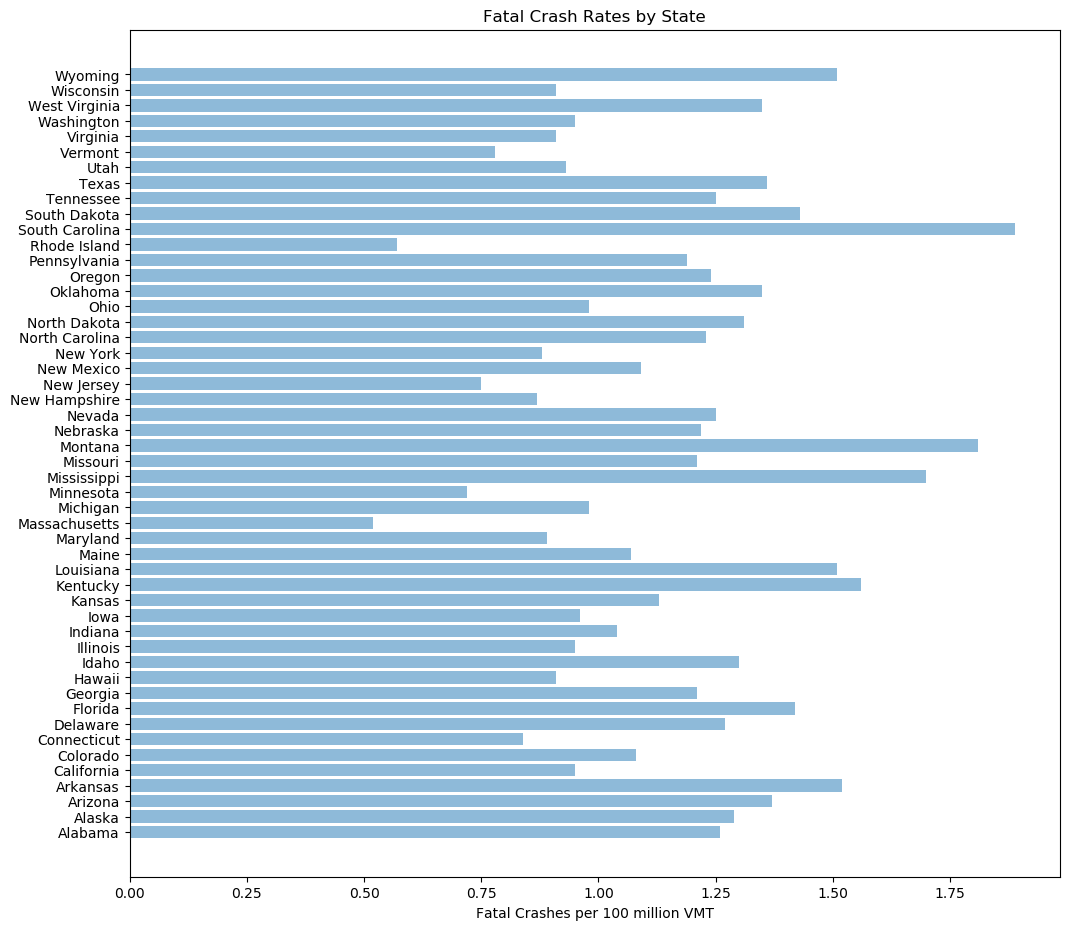

In [16]:
#create a bar chart
plt.barh(y_pos, crashesVMT, align='center', alpha=0.5 )
plt.yticks(y_pos, states)
plt.xlabel('Fatal Crashes per 100 million VMT')
plt.title('Fatal Crash Rates by State')

plt.show()

#it looks like comparing states based on their relative fatality rates is more instructive than using absolute amounts
#lets stick to using these rates 

In [17]:
#just to make sure we don't have any obvious outliers lets find the IQR for this variable
q25,q75=crashesVMT.quantile([0.25,0.75])
#Computing the distance between them or IQR:
IQR=q75-q25
IQR

0.40500000000000025

In [18]:
#setting a maximum and minimum threshold for detecting outliers
capHigh = q75 + IQR*1.5
capHigh #maximum threshold

1.9475000000000007

In [19]:
capLow=q25 - IQR*1.5
capLow #minimum threshold

0.32749999999999968

looks like we don't have any obvious outliers in using crash rates

### Step 3: Understand the data

Now that we have seen that some states have higher rates of fatal crashes, let's try to figure out why this may be.

To do this, lets take a look at some of the variables in our data set and see if they can't help to uncover some plausible explanations

In [20]:
#starting with some simple correlation coefficients
#first, let's make a variable to compare to our fatal crash rate figures to
#lets see how the presence of alocohol in fatal crashes is correlated with fatal crash rates
crashesVMTalcohol=crashdata.iloc[:,[4,7]]
crashesVMTalcohol.corr() #seems to be a pretty weak correlation

,Fatalities_per_100_million_vehicle_miles_travelled_2015,Percent_Alcohol
Fatalities_per_100_million_vehicle_miles_travelled_2015,1.000000,-0.001069
Percent_Alcohol,-0.001069,1.000000


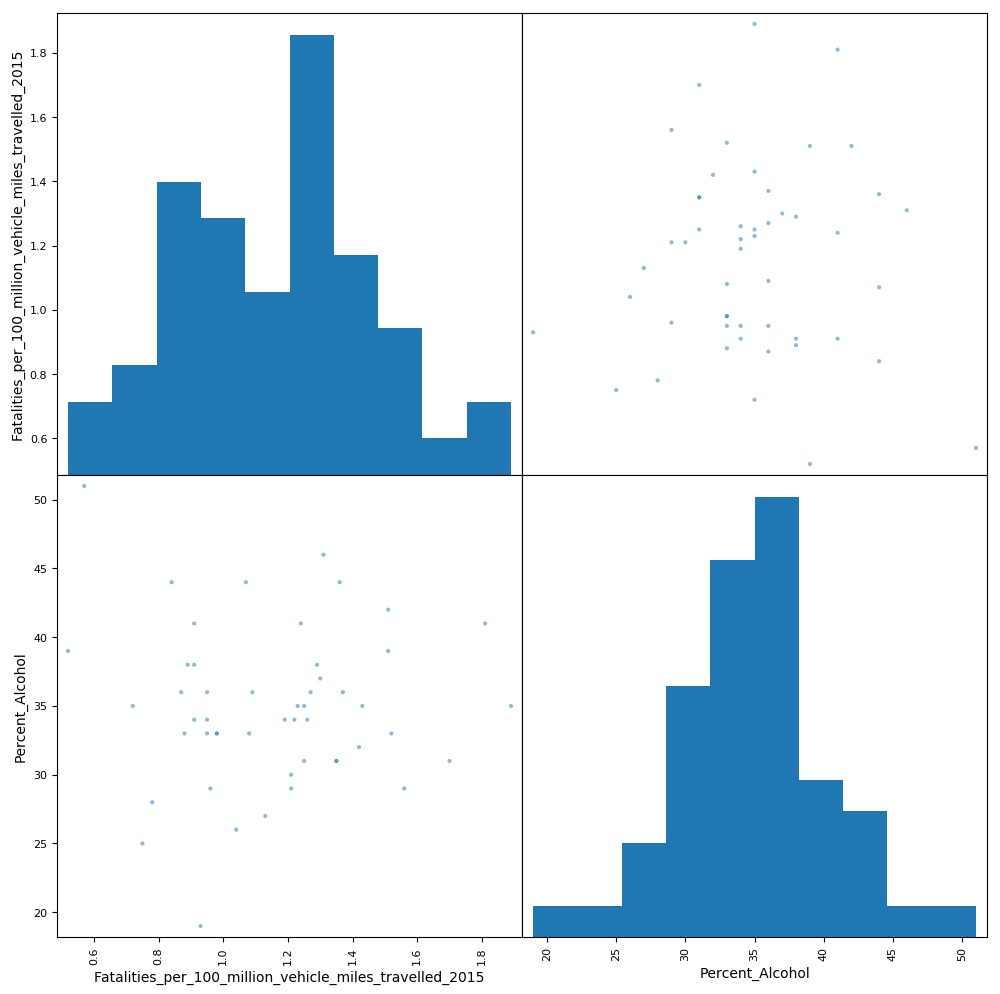

In [21]:
#plotting our results
pd.plotting.scatter_matrix(crashesVMTalcohol,figsize=(12, 12))
plt.show() #these scatterplots illustrate this weak relationship quite effectively

In [22]:
#lets try another correlation
crashesVMTrural=crashdata.iloc[:,[4,11]] #this time, we see how ruralness and crash rates are correlated
crashesVMTrural.corr()

,Fatalities_per_100_million_vehicle_miles_travelled_2015,Percent_Rural
Fatalities_per_100_million_vehicle_miles_travelled_2015,1.000000,0.421104
Percent_Rural,0.421104,1.000000


it looks as though ruralness has a moderately strong and positive relationship with fatal crash rates

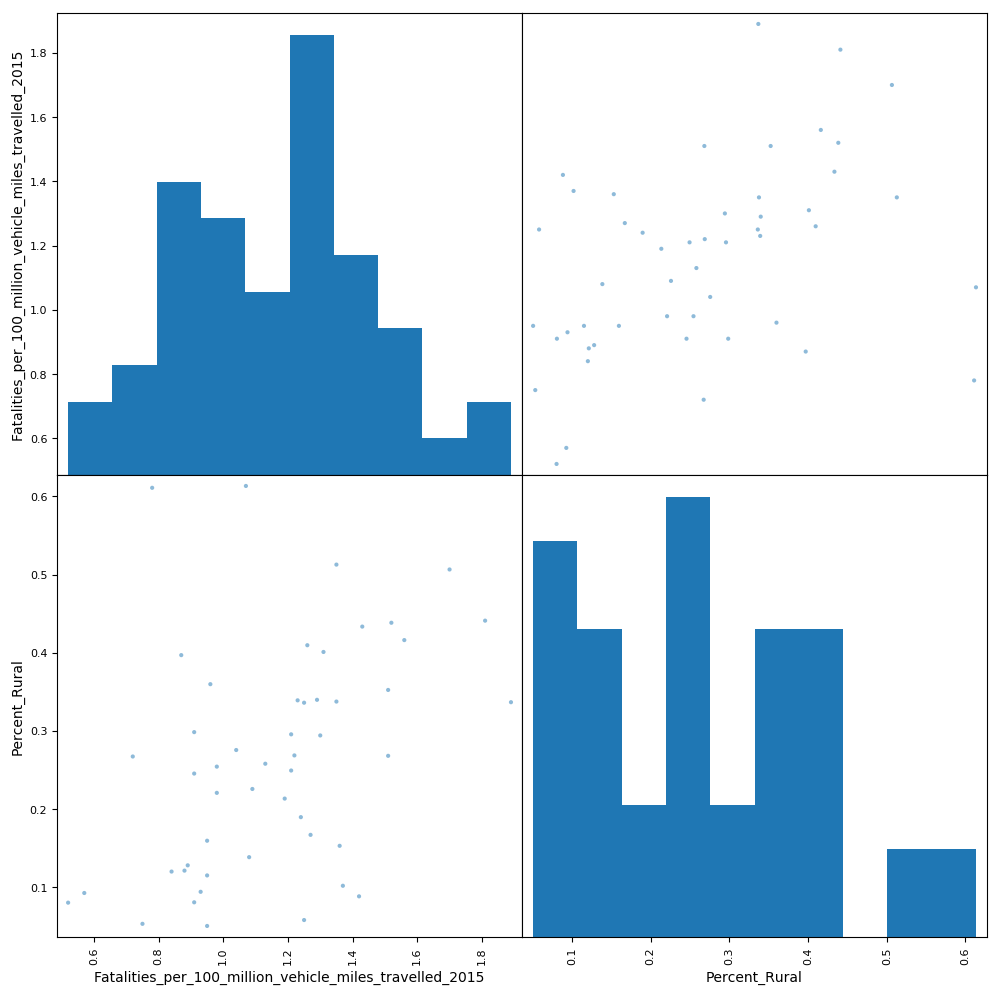

In [23]:
#plotting once more
pd.plotting.scatter_matrix(crashesVMTrural,figsize=(12, 12))
plt.show()

In [24]:
#and another correlation
crashesVMTroadquality=crashdata.iloc[:,[4,8]]
crashesVMTroadquality.corr()

,Fatalities_per_100_million_vehicle_miles_travelled_2015,Poor_Roads
Fatalities_per_100_million_vehicle_miles_travelled_2015,1.000000,-0.403843
Poor_Roads,-0.403843,1.000000



this is somewhat surprising, it looks like as the percentage of roads that are rated 'poor' increases, crash rates tend to fall; this relationship also appears to be moderately strong

In [25]:
#another correlation
crashesVMTtraveltime=crashdata.iloc[:,[4,9]]
crashesVMTtraveltime.corr()

,Fatalities_per_100_million_vehicle_miles_travelled_2015,Mean_Travel_Time_to_Work
Fatalities_per_100_million_vehicle_miles_travelled_2015,1.000000,-0.427239
Mean_Travel_Time_to_Work,-0.427239,1.000000


as our intuition may lead us to believe, as commute times increase crash rates tend to fall. Indeed, to some extent commute times are a correlate of urban/ruralness; the higher the commute time, the lower ruralness and thus crash rates

In [26]:
traveltimerural=crashdata.iloc[:,[9,11]]
traveltimerural.corr()

,Mean_Travel_Time_to_Work,Percent_Rural
Mean_Travel_Time_to_Work,1.000000,-0.512742
Percent_Rural,-0.512742,1.000000


just to confirm this suspicion, we indeed find a moderately strong negative relationship between travel times and ruralness

In [27]:
#another correlation
crashesVMTage=crashdata.iloc[:,[4,12]]
crashesVMTage.corr()

,Fatalities_per_100_million_vehicle_miles_travelled_2015,Median_Age
Fatalities_per_100_million_vehicle_miles_travelled_2015,1.000000,-0.176086
Median_Age,-0.176086,1.000000


we might suspect that older and younger populations would have higher fatality rates; our results suggest that younger populations, in this case, tend to raise fatality rates; of course the median age of a county could be correlated with a number of other factors which may also be correlated with crash rates

In [28]:
#final correlation
crashesVMTincome=crashdata.iloc[:,[4,13]]
crashesVMTincome.corr()

,Fatalities_per_100_million_vehicle_miles_travelled_2015,Per_capita_income
Fatalities_per_100_million_vehicle_miles_travelled_2015,1.000000,-0.660551
Per_capita_income,-0.660551,1.000000


In [30]:
#a faster way of computing correlation coefficients in one place:
from scipy.stats import pearsonr

explanans=crashdata.columns[[4,7,8,9,11,12,13]]
for x in explanans:
    p=pearsonr(crashdata[x],crashdata['Fatalities_per_100_million_vehicle_miles_travelled_2015'])
    print('Pearson',p[0],' \t Is significant?',p[1]<0.05)

Pearson 1.0  	 Is significant? True
Pearson -0.00106946394999  	 Is significant? False
Pearson -0.403842942339  	 Is significant? True
Pearson -0.4272386482  	 Is significant? True
Pearson 0.421104134355  	 Is significant? True
Pearson -0.17608577864  	 Is significant? False
Pearson -0.660550802282  	 Is significant? True


##### Towards a regression: taking the investigation one step further

lets continue our exploration of explanatory variables by running a regression

In [31]:
#first lets make sure that our explanatory variables do not suffer from collinearity 
crashdata[explanans].corr()

,Fatalities_per_100_million_vehicle_miles_travelled_2015,Percent_Alcohol,Poor_Roads,Mean_Travel_Time_to_Work,Percent_Rural,Median_Age,Per_capita_income
Fatalities_per_100_million_vehicle_miles_travelled_2015,1.000000,-0.001069,-0.403843,-0.427239,0.421104,-0.176086,-0.660551
Percent_Alcohol,-0.001069,1.000000,0.277214,-0.064540,-0.046173,0.191592,0.290869
Poor_Roads,-0.403843,0.277214,1.000000,0.342117,-0.334950,0.158869,0.400099
Mean_Travel_Time_to_Work,-0.427239,-0.064540,0.342117,1.000000,-0.512742,0.284860,0.428438
Percent_Rural,0.421104,-0.046173,-0.334950,-0.512742,1.000000,0.270930,-0.424281
Median_Age,-0.176086,0.191592,0.158869,0.284860,0.270930,1.000000,0.179856
Per_capita_income,-0.660551,0.290869,0.400099,0.428438,-0.424281,0.179856,1.000000


no two variables have a coefficient beyond 0.5, and most are around 0.4 or below--indicating a moderate or weak relationship--so let's move forward

In [32]:
import statsmodels.formula.api as smf

formula='Fatalities_per_100_million_vehicle_miles_travelled_2015 ~ Percent_Alcohol + Poor_Roads + Mean_Travel_Time_to_Work + Percent_Rural + Median_Age + Per_capita_income'
LinRegEPI = smf.ols(formula, data=crashdata).fit()

LinRegEPI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                               OLS Regression Results                                              
===================================================================================================================
Dep. Variable:     Fatalities_per_100_million_vehicle_miles_travelled_2015   R-squared:                       0.540
Model:                                                                 OLS   Adj. R-squared:                  0.475
Method:                                                      Least Squares   F-statistic:                     8.397
Date:                                                     Tue, 06 Mar 2018   Prob (F-statistic):           4.77e-06
Time:                                                             06:10:14   Log-Likelihood:                 9.7281
No. Observations:                                                       50   AIC:                            -5.456
Df Residuals:                                                           43   BIC:                             7.928
Df Model:                                                                6                                         
Covariance Type:                                                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.5444      0.524      4.853      0.000       1.487       3.602
Percent_Alcohol              0.0130      0.006      2.162      0.036       0.001       0.025
Poor_Roads                  -0.0042      0.003     -1.388      0.172      -0.010       0.002
Mean_Travel_Time_to_Work     0.0030      0.012      0.250      0.804      -0.021       0.027
Percent_Rural                0.4005      0.310      1.290      0.204      -0.225       1.026
Median_Age                  -0.0199      0.017     -1.190      0.240      -0.054       0.014
Per_capita_income        -4.029e-05   9.13e-06     -4.412      0.000   -5.87e-05   -2.19e-05
==============================================================================
Omnibus:                        0.957   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.612
Skew:                           0.271   Prob(JB):                        0.736
Kurtosis:                       3.026   Cond. No.                     5.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

as it turns out, only percent alcohol and per capita income seem to have a significant effect on crash fatality rates; the r-squared value suggests that a fair bit of the variation in fatality rates is explained by variation in the included variables

In [33]:
#a simpler way to view regression results
pd.concat({'Coefficients':LinRegEPI.params,
           'Significant?':LinRegEPI.pvalues<0.05},axis=1)

,Coefficients,Significant?
Intercept,2.544398,True
Percent_Alcohol,0.013031,True
Poor_Roads,-0.004184,False
Mean_Travel_Time_to_Work,0.002993,False
Percent_Rural,0.400475,False
Median_Age,-0.019881,False
Per_capita_income,-0.000040,True


### Step 4: Map the data